<ipython-input-3-16725caadbb4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_demand.index, y=monthly_demand.values, palette="Blues")


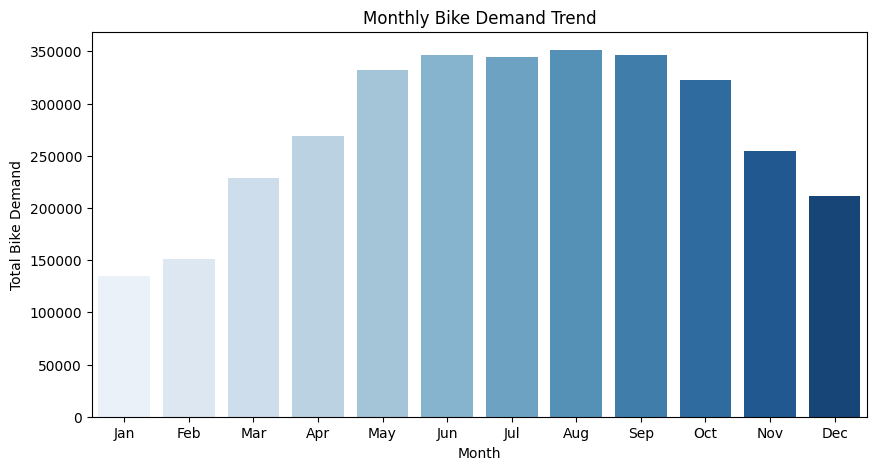

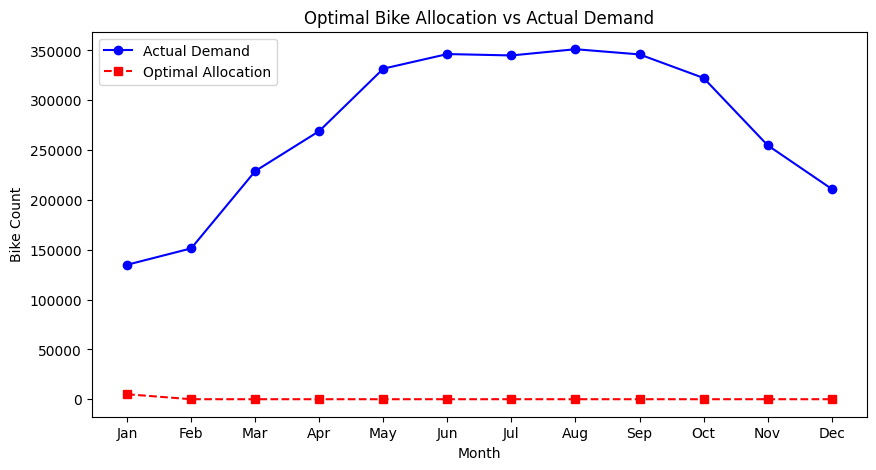

<ipython-input-3-16725caadbb4>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df_cleaned, palette="coolwarm")


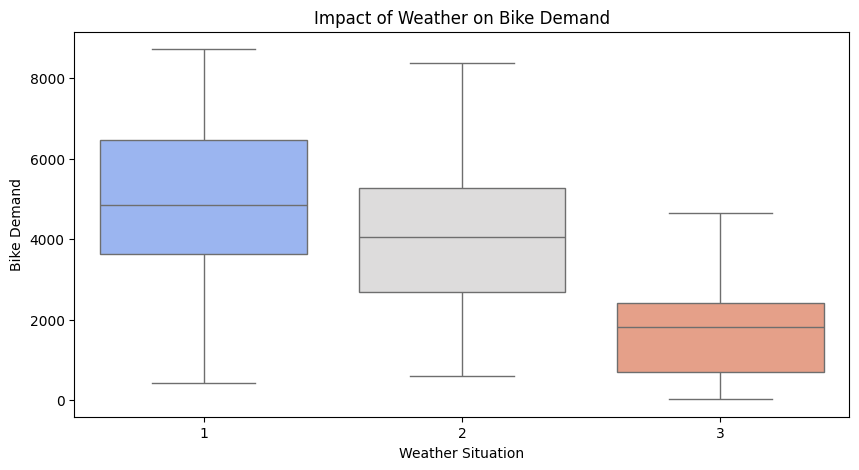

<ipython-input-3-16725caadbb4>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=df_cleaned, palette="viridis")


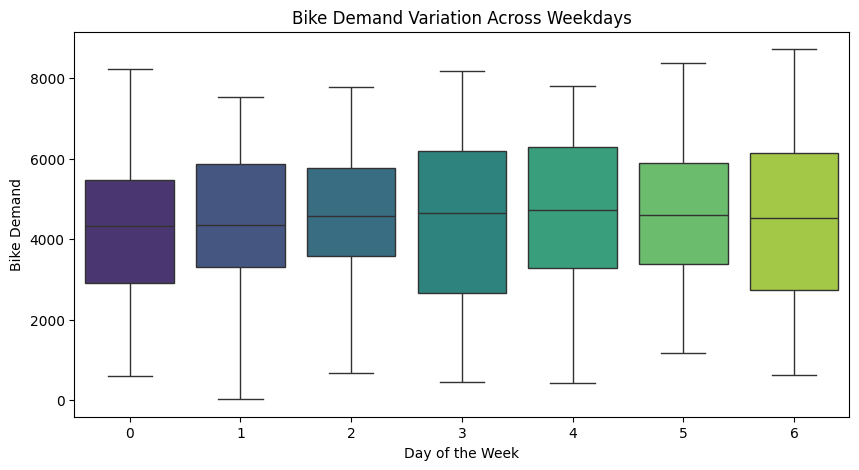

Cleaned data saved as Bike_Sharing_Cleaned.xlsx


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog

# Load the dataset
file_path = "Bike Sharing Dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Drop the 'instant' column
df_cleaned = df.drop(columns=['instant'])

# Convert 'dteday' to datetime format
df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

# Ensure categorical columns are of type 'category'
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

# Remove duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned data as an Excel file
cleaned_file_path = "Bike_Sharing_Cleaned.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)

# Prescriptive Analysis: Optimize bike allocation
# Aggregate demand by month to identify trends
df_cleaned['month'] = df_cleaned['dteday'].dt.month
monthly_demand = df_cleaned.groupby('month')['cnt'].sum()

# Plot monthly bike demand
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Total Bike Demand")
plt.title("Monthly Bike Demand Trend")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Define an optimization problem: Minimize bike shortages while considering seasonal variations
fleet_size = 5000  # Assume a total fleet size
average_monthly_demand = monthly_demand.values

# Define the optimization objective: Minimize shortages (fleet size - demand)
c = [-1] * 12  # Negative for maximization (convert to minimization problem)
A_ub = [[1] * 12]  # Constraint: Total bikes allocated should not exceed fleet size
b_ub = [fleet_size]

# Solve the linear programming problem
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[(0, None)] * 12, method='highs')

# Extract optimal bike allocations per month
optimal_allocation = res.x if res.success else [0] * 12

# Plot optimal bike allocation vs actual demand
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), monthly_demand.values, marker='o', label="Actual Demand", color='blue')
plt.plot(range(1, 13), optimal_allocation, marker='s', linestyle='--', label="Optimal Allocation", color='red')
plt.xlabel("Month")
plt.ylabel("Bike Count")
plt.title("Optimal Bike Allocation vs Actual Demand")
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Decision Analysis: Impact of weather and weekdays on demand
plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=df_cleaned, palette="coolwarm")
plt.xlabel("Weather Situation")
plt.ylabel("Bike Demand")
plt.title("Impact of Weather on Bike Demand")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=df_cleaned, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Bike Demand")
plt.title("Bike Demand Variation Across Weekdays")
plt.show()

print(f"Cleaned data saved as {cleaned_file_path}")
